In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from game.analytics import plot_loss, plot_reward, plot_timers, plot_total_steps

### Baseline for random games

In [96]:
from game.game import right, left, up, down, start
import random

actions = {
    "right": right,
    "left": left,
    "up": up,
    "down": down,
}

max_moves_to_test = list(range(2, 500, 1))
n_repetitions = 10

logs = []

In [97]:
for i, max_moves in enumerate(max_moves_to_test):
    if i % int(len(max_moves_to_test) / 12) == 0:
        print(max_moves)

    for rep in range(n_repetitions):
        n_actions = {k: 0 for k in actions.keys()}
        n_moves = 0
        board = start()
        done = False
        while not done:
            action = random.choice(list(actions.keys()))
            board, reward, done = actions[action](board)

            n_moves += 1
            n_actions[action] += 1

            if n_moves > max_moves:
                done = True

        tot_actions = sum(list(n_actions.values()))
        n_actions = {k: round(n_actions[k]/tot_actions * 100, 2) for k in n_actions}

        logs.append({
            "max_moves": max_moves,
            "tot_moves": n_moves,
            "actions": n_actions,
        })
print("DONE")

2
43
84
125
166
207
248
289
330
371
412
453
494


C:\Users\HV51OU\AppData\Local\Temp\ipykernel_616\738117613.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


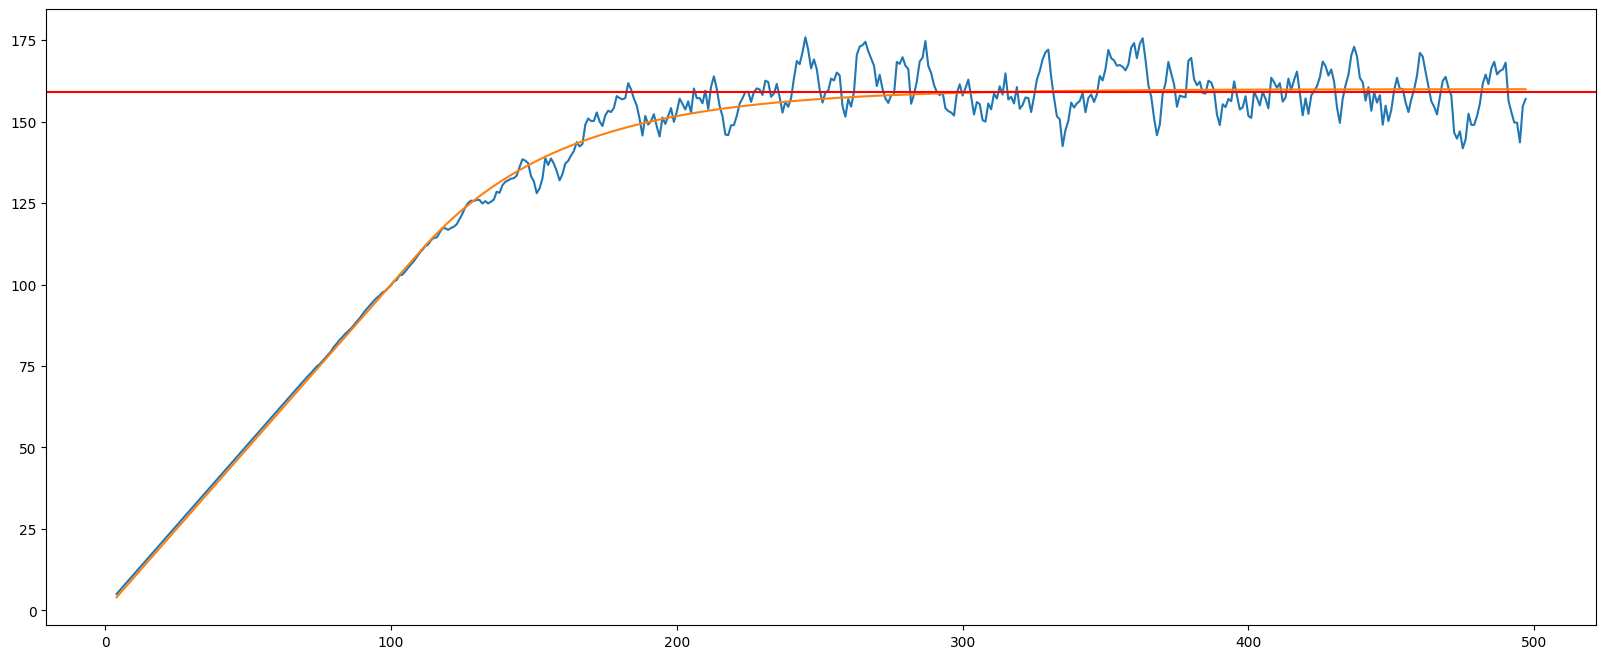

In [160]:
from math import pow, e
WINDOW_SIZE = 5

def f(x):
    return 50 * (1 - pow(e, -(x-110)/50)) + 110 if x >= 110 else x

raw = {}
for log in logs:
    if not log["max_moves"] in raw.keys():
        raw[log["max_moves"]] = []

    raw[log["max_moves"]].append(log["tot_moves"])

raw = {k: sum(raw[k])/len(raw[k]) for k in raw.keys()}
raw = pd.Series(raw)

raw = raw.rolling(WINDOW_SIZE, center=True).mean().dropna()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(
    list(raw.index),
    raw.to_list(),
)
ax.plot(
    list(raw.index),
    [f(int(i)) for i in list(raw.index)],
)
ax.axhline(raw[raw.index > 300].mean(), c='red')
fig.show();

C:\Users\HV51OU\AppData\Local\Temp\ipykernel_616\314806346.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


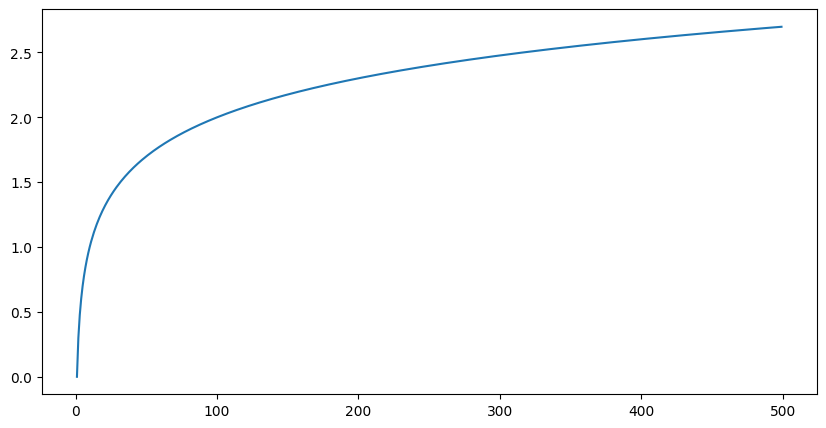

In [113]:
from math import pow, e

def f(x):
    return 160 * (1 - pow(e, -i/100))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(
    [i for i in range(1, 500)],
    [f(i) for i in range(1, 500)]
)
fig.show()

C:\Users\HV51OU\AppData\Local\Temp\ipykernel_616\1420655149.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


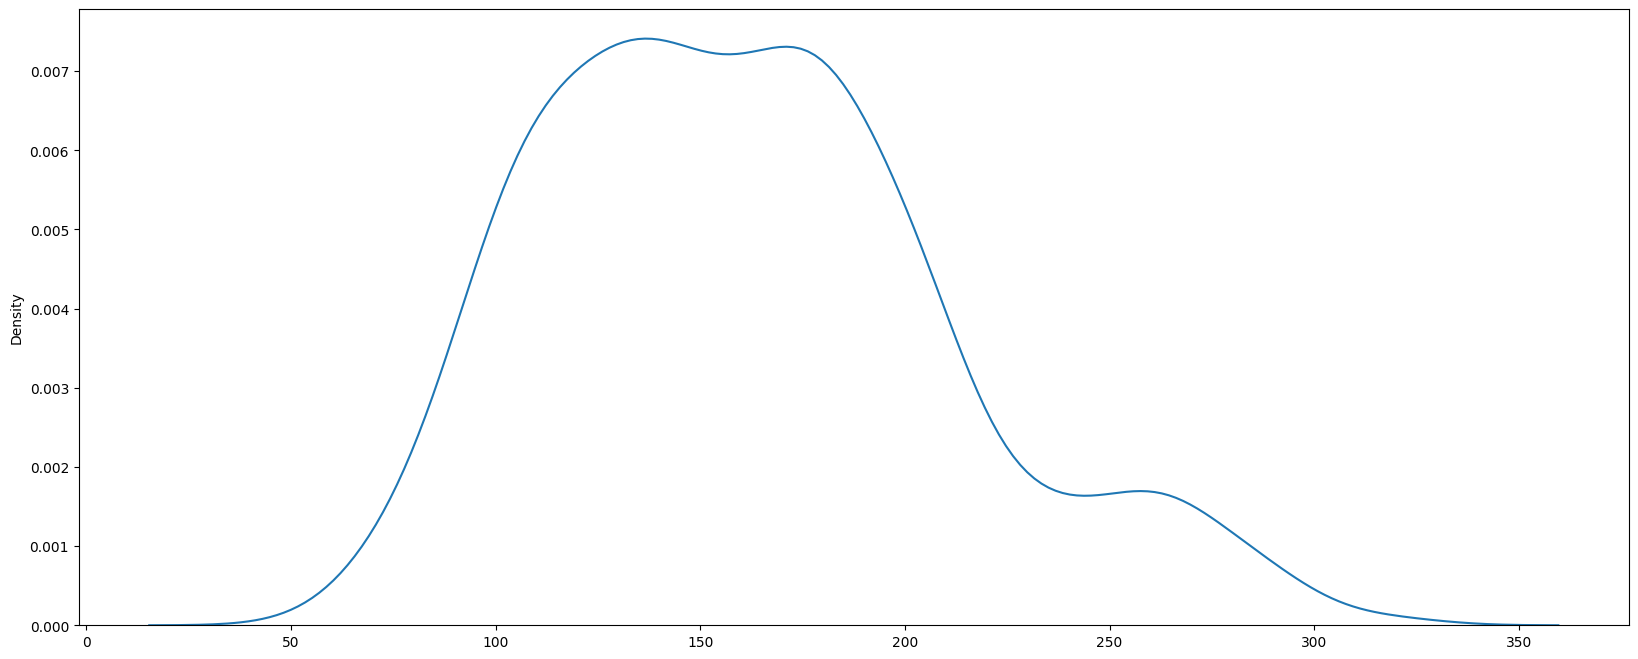

In [85]:
import seaborn as sns

tmp = [log["tot_moves"] for log in logs if log["max_moves"] > 250]

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(tmp, ax=ax)
fig.show()

### Plot how a single run went

In [63]:
log_file = "model_checkpoints/2023_03_02_23_56.json"

In [64]:
with open(log_file, 'r') as f:
    log = json.load(f)
log["rewards"] = [int(i) for i in log["rewards"]]
log.keys()

dict_keys(['params', 'rewards', 'losses', 'timers', 'episodes_total_steps', 'target_reset_episodes'])

In [66]:
# plot_timers(log['timers'])

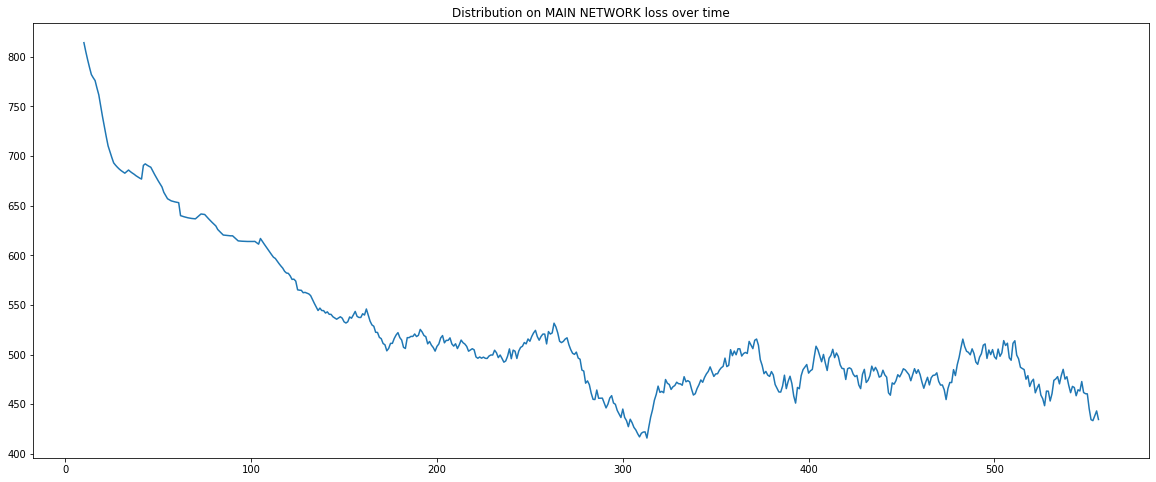

In [67]:
plot_loss(log["losses"])

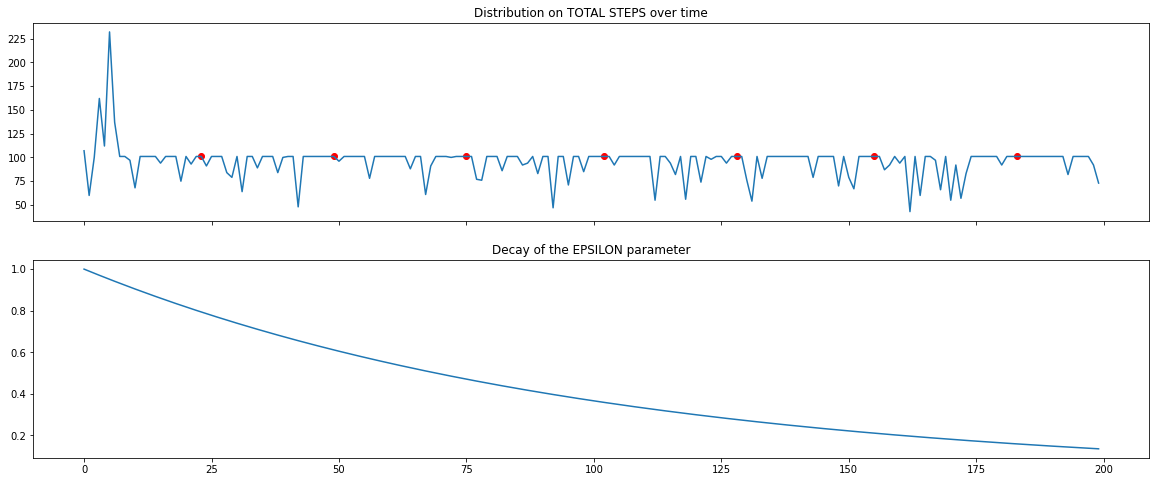

In [68]:
epsilon, decay_factor = (log["params"]["epsilon"], log["params"]["decay_factor"])
plot_total_steps(log["episodes_total_steps"], epsilon, decay_factor, log["target_reset_episodes"], window=1)

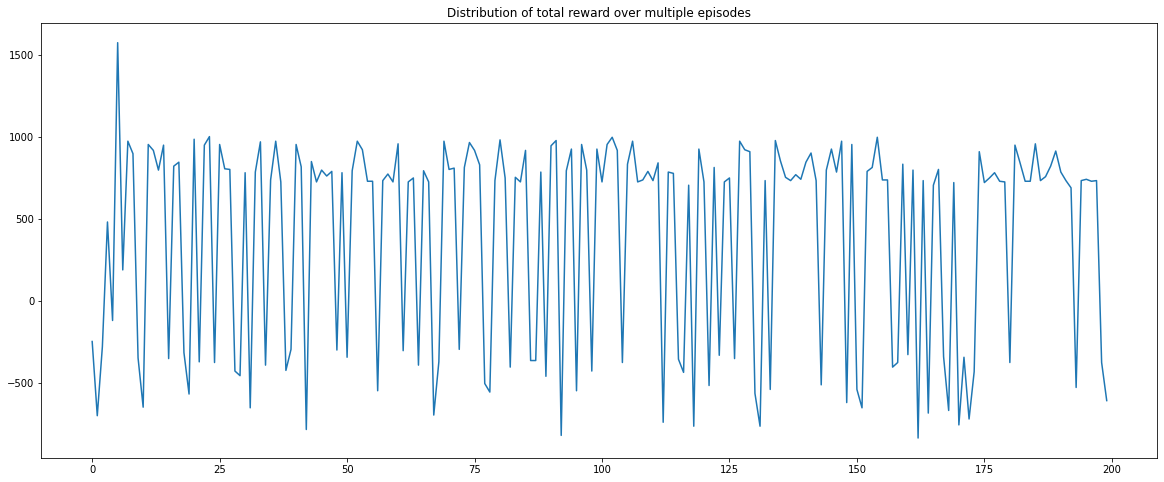

In [69]:
plot_reward(log["rewards"], window=1)

In [62]:
log["params"]

{'update_target_network_every': 500,
 'update_main_network_every': 32,
 'epsilon': 1.0,
 'decay_factor': 0.01,
 'episodes': 200,
 'max_moves_per_episode': 100,
 'hidden_size': 32,
 'conv': False,
 'random_seed': 0,
 'mini_batch_size': 32,
 'epochs': 4,
 'learning_rate': 0.7,
 'discount_factor': 0.618,
 'min_replay_size': 1000,
 'n_samples_to_train_on': 5000,
 'log_training_events': False,
 'store_run_at': 'model_checkpoints',
 'no_store': False,
 'cuda': False}

### How to decay a number over time

In [ ]:
start = 0.9
# decay_factor = 0.5
period = 200

for decay_factor in [1, 0.8, 0.5, 0.1, 0.05]:
    y = []
    x = []
    for i in range(period):
        x.append(i)
        y.append(start/(1 + decay_factor*i))

    plt.plot(x, y, label=decay_factor)

plt.legend()
plt.title("Decay shapes starting from 0.9 and decaying over 200 steps")
plt.show()